# Problem Statment

Predict whether a tumor is benign (non-cancerous) or malignant (cancerous) based on features extracted from a breast mass (such as texture, radius, smoothness, etc)

# About The Dataset

569 Samples

30 Features

2 Classes (0 = malignant, 1 = benign)

# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer

from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate

from sklearn.preprocessing import LabelEncoder, StandardScaler

from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix

from sklearn.linear_model import LogisticRegression # logistic regression model
from sklearn.neighbors import KNeighborsClassifier # knn model
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC # svm model
from sklearn.ensemble import RandomForestClassifier # random forest model


from sklearn.metrics import classification_report

import pickle

import warnings
warnings.filterwarnings('ignore')

# Explore The Dataset

In [2]:
# load the breast cancer dataset from sklearn
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target  # 0 = malignant, 1 = benign

In [3]:
df.shape

(569, 31)

In [4]:
df.head(10) # display the first 10 rows

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0
5,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,0
6,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,0
7,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,0
8,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389,...,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720,0
9,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,0.08243,...,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750,0


In [5]:
df.tail() # display the last 5 rows

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [7]:
df.isnull().sum()

,0
mean radius,0
mean texture,0
mean perimeter,0
mean area,0
mean smoothness,0
mean compactness,0
mean concavity,0
mean concave points,0
mean symmetry,0
mean fractal dimension,0


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


In [9]:
df['target'].value_counts()

,count
target,
1,357
0,212


In [10]:
df['target'].value_counts() * 100 / 569

,count
target,
1,62.741652
0,37.258348


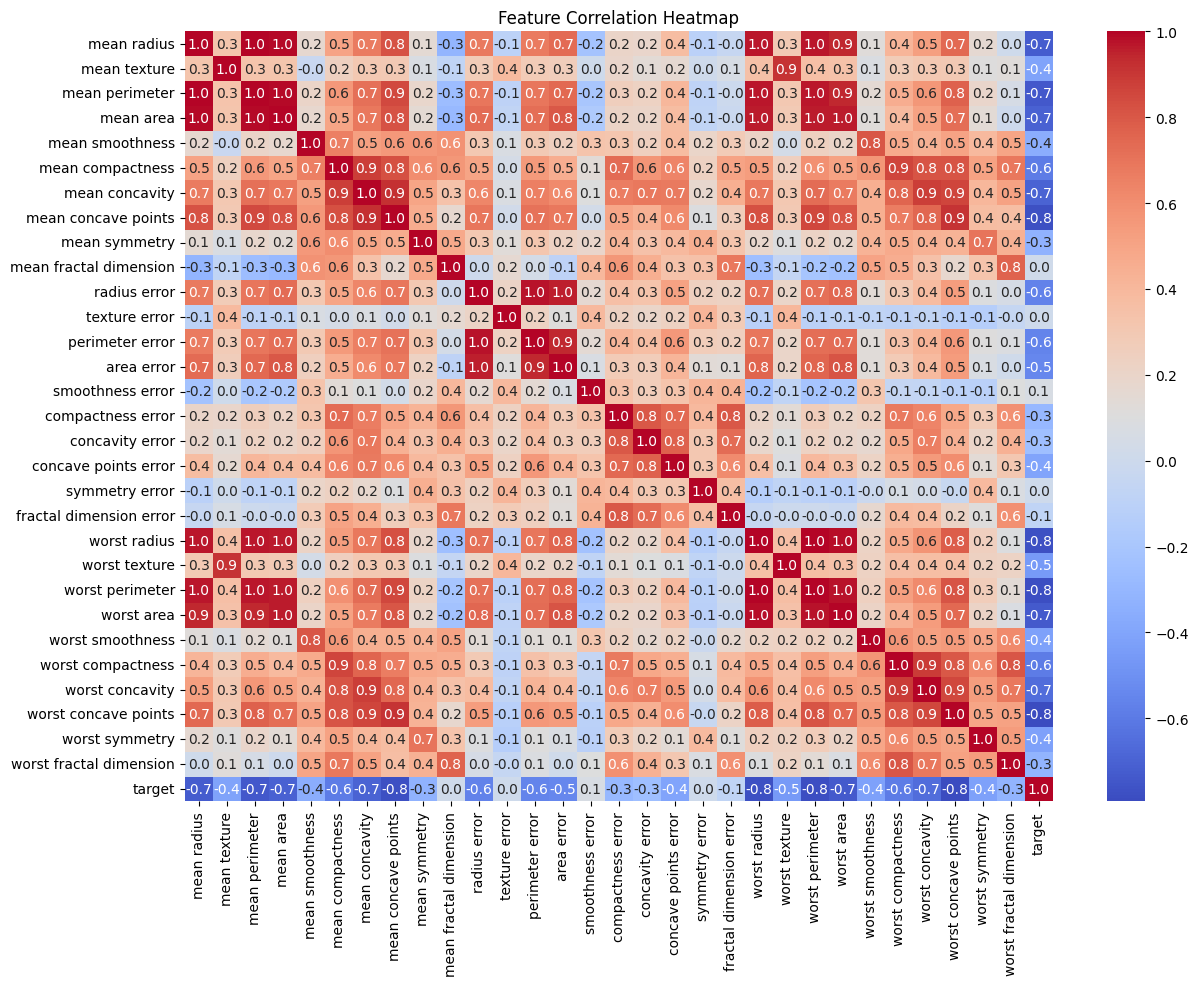

In [11]:
# Correlation heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(df.corr(), cmap='coolwarm', annot=True, fmt='.1f')
plt.title("Feature Correlation Heatmap")
plt.show()

# Preprocessing

In [12]:
# separate features and target
X = df.drop('target', axis=1)
y = df['target']

# split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# normalize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [13]:
Accuracies= {} # dictionry to save all models accuracies

# Logistic Regression

In [14]:
# define the model
lg = LogisticRegression()

# using grid search for parameters
parameters=[{'penalty':['l1','l2'], 'C':[0.1,0.4,0.5], 'random_state':[0]}]
search = GridSearchCV(lg, parameters, scoring='accuracy', n_jobs=-1)
result = search.fit(X_train_scaled, y_train)

# result
print(f"Best Score: {result.best_score_}")
print(f"Best Hyperparameters: {result.best_params_}")

Best Score: 0.9758241758241759
Best Hyperparameters: {'C': 0.4, 'penalty': 'l2', 'random_state': 0}


In [15]:
lr = LogisticRegression(C=0.4, penalty='l2', random_state=0)
lr.fit(X_train_scaled, y_train)

y_pred = lr.predict(X_test_scaled) # predict the class labels
y_proba = lr.predict_proba(X_test_scaled) # return the probability estimates for each class

In [16]:
roc_auc = roc_auc_score(y_test, y_proba[:, 1]) # give the probability for the positive class (1)
print(f"ROC AUC Score: {roc_auc * 100:.4f}")

ROC AUC Score: 99.7380


Accuracy: 98.25%
Logistic TRAIN Score: 98.68%
Logistic TEST Score: 98.25%



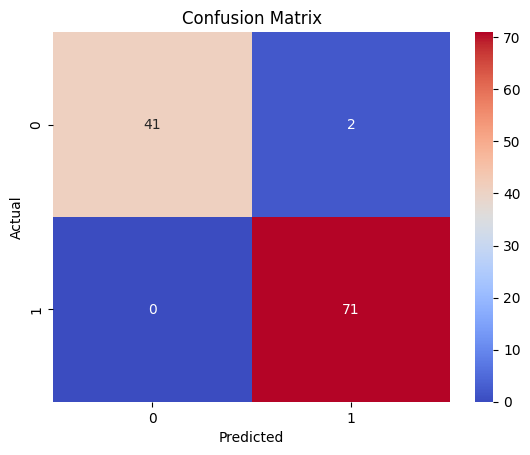

In [17]:
acc = accuracy_score(y_test, y_pred) * 100
Accuracies['Logistic Regression'] = acc

print(f"Accuracy: {acc:.2f}%")
print(f"Logistic TRAIN Score: {lr.score(X_train_scaled, y_train) * 100:.2f}%")
print(f"Logistic TEST Score: {lr.score(X_test_scaled, y_test) * 100:.2f}%")
print()

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [18]:
Accuracies

{'Logistic Regression': 98.24561403508771}

# Support Vector Machine (SVM)

In [19]:
# define the model
svc = SVC()

# using grid search for parameters
parameters = [{'kernel':['linear'], 'random_state':[2]}, {'kernel':['rbf'], 'gamma':[0.9,0.06,0.3], 'random_state':[0],
        'C':[1,2,3,4,5,6], 'degree':[2], 'probability':[True]}]
search = GridSearchCV(svc, parameters, scoring='accuracy')
result = search.fit(X_train_scaled, y_train)

# result
print(f"Best Score: {result.best_score_}")
print(f"Best Hyperparameters: {result.best_params_}")

Best Score: 0.9780219780219781
Best Hyperparameters: {'C': 3, 'degree': 2, 'gamma': 0.06, 'kernel': 'rbf', 'probability': True, 'random_state': 0}


In [20]:
svc = SVC(C=3, degree=2, gamma=0.06, kernel='rbf', probability=True, random_state=0)
svc.fit(X_train_scaled, y_train)

y_pred = svc.predict(X_test_scaled) # predict the class labels
y_proba = svc.predict_proba(X_test_scaled) # return the probability estimates for each class

In [21]:
roc_auc = roc_auc_score(y_test, y_proba[:, 1]) # give the probability for the positive class (1)
print(f"ROC AUC Score: {roc_auc * 100:.4f}")

ROC AUC Score: 99.3122


Accuracy: 97.37%
SVM TRAIN Score: 99.34%
SVM TEST Score: 97.37%



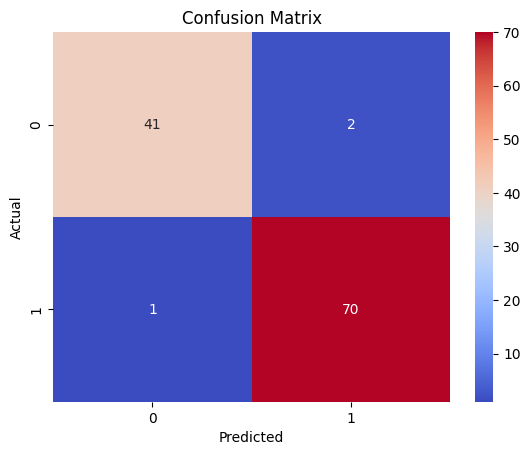

In [22]:
acc = accuracy_score(y_test, y_pred) * 100
Accuracies['SVM'] = acc

print(f"Accuracy: {acc:.2f}%")
print(f"SVM TRAIN Score: {svc.score(X_train_scaled, y_train) * 100:.2f}%")
print(f"SVM TEST Score: {svc.score(X_test_scaled, y_test) * 100:.2f}%")
print()

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [23]:
Accuracies

{'Logistic Regression': 98.24561403508771, 'SVM': 97.36842105263158}

# Random Forest Classifier

In [24]:
# define the model
rf = RandomForestClassifier()

# using grid search for parameters
parameters = [{'max_depth': np.arange(1, 10),'min_samples_split': np.arange(2, 5),'random_state': [3], 'n_estimators': np.arange(10, 20)}]
search = GridSearchCV(rf, parameters, scoring='accuracy')
result = search.fit(X_train_scaled, y_train)

# result
print(f"Best Score: {result.best_score_}")
print(f"Best Hyperparameters: {result.best_params_}")

Best Score: 0.9626373626373625
Best Hyperparameters: {'max_depth': np.int64(6), 'min_samples_split': np.int64(2), 'n_estimators': np.int64(13), 'random_state': 3}


In [25]:
rf = RandomForestClassifier(max_depth=6, min_samples_split=2, n_estimators=13, random_state=3)
rf.fit(X_train_scaled, y_train)

y_pred = rf.predict(X_test_scaled) # predict the class labels
y_proba = rf.predict_proba(X_test_scaled) # return the probability estimates for each class

In [26]:
roc_auc = roc_auc_score(y_test, y_proba[:, 1]) # give the probability for the positive class (1)
print(f"ROC AUC Score: {roc_auc * 100:.4f}")

ROC AUC Score: 98.9846


Accuracy: 96.49%
Random Forest TRAIN Score: 99.34%
Random Forest TEST Score: 96.49%



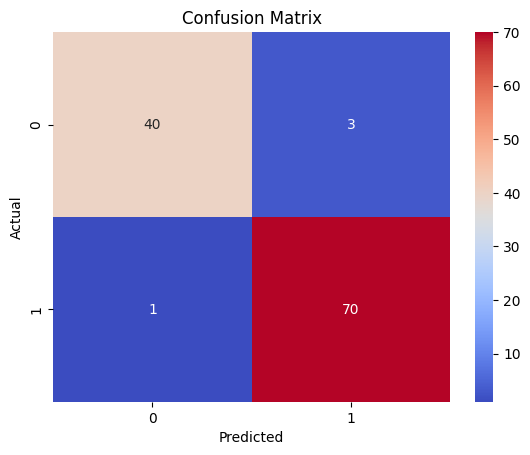

In [27]:
acc = accuracy_score(y_test, y_pred) * 100
Accuracies['Random Forest'] = acc

print(f"Accuracy: {acc:.2f}%")
print(f"Random Forest TRAIN Score: {rf.score(X_train_scaled, y_train) * 100:.2f}%")
print(f"Random Forest TEST Score: {rf.score(X_test_scaled, y_test) * 100:.2f}%")
print()

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [28]:
Accuracies

{'Logistic Regression': 98.24561403508771,
 'SVM': 97.36842105263158,
 'Random Forest': 96.49122807017544}

# K-Nearest Neighbors (KNN)

In [29]:
# define the model
knn = KNeighborsClassifier()

# using grid search for parameters
parameters=[{'n_neighbors':np.arange(2,40), 'n_jobs':[-1], 'leaf_size':[30,50]}]
search = GridSearchCV(knn, parameters, scoring='accuracy', cv=2)
result = search.fit(X_train_scaled, y_train)

# result
print(f"Best Score: {result.best_score_}")
print(f"Best Hyperparameters: {result.best_params_}")

Best Score: 0.9626226910889559
Best Hyperparameters: {'leaf_size': 30, 'n_jobs': -1, 'n_neighbors': np.int64(5)}


In [30]:
knn = KNeighborsClassifier(leaf_size=30, n_jobs=-1, n_neighbors=5)
knn.fit(X_train_scaled, y_train)

y_pred = knn.predict(X_test_scaled) # predict the class labels
y_proba = knn.predict_proba(X_test_scaled) # return the probability estimates for each class

In [31]:
roc_auc = roc_auc_score(y_test, y_proba[:, 1]) # give the probability for the positive class (1)
print(f"ROC AUC Score: {roc_auc * 100:.4f}")

ROC AUC Score: 98.1985


Accuracy: 94.74%
KNN TRAIN Score: 98.02%
KNN TEST Score: 94.74%



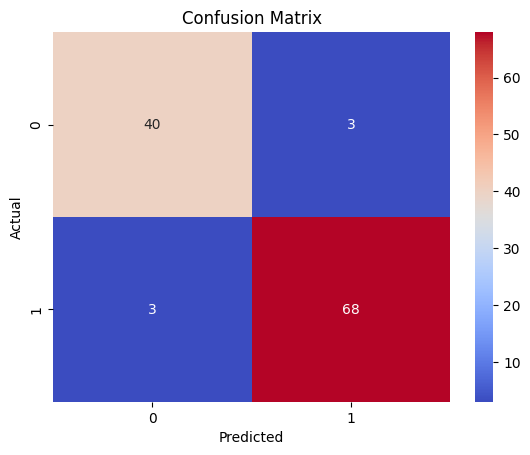

In [32]:
acc = accuracy_score(y_test, y_pred) * 100
Accuracies['KNN'] = acc

print(f"Accuracy: {acc:.2f}%")
print(f"KNN TRAIN Score: {knn.score(X_train_scaled, y_train) * 100:.2f}%")
print(f"KNN TEST Score: {knn.score(X_test_scaled, y_test) * 100:.2f}%")
print()

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [33]:
Accuracies

{'Logistic Regression': 98.24561403508771,
 'SVM': 97.36842105263158,
 'Random Forest': 96.49122807017544,
 'KNN': 94.73684210526315}

# Choose The Best Model

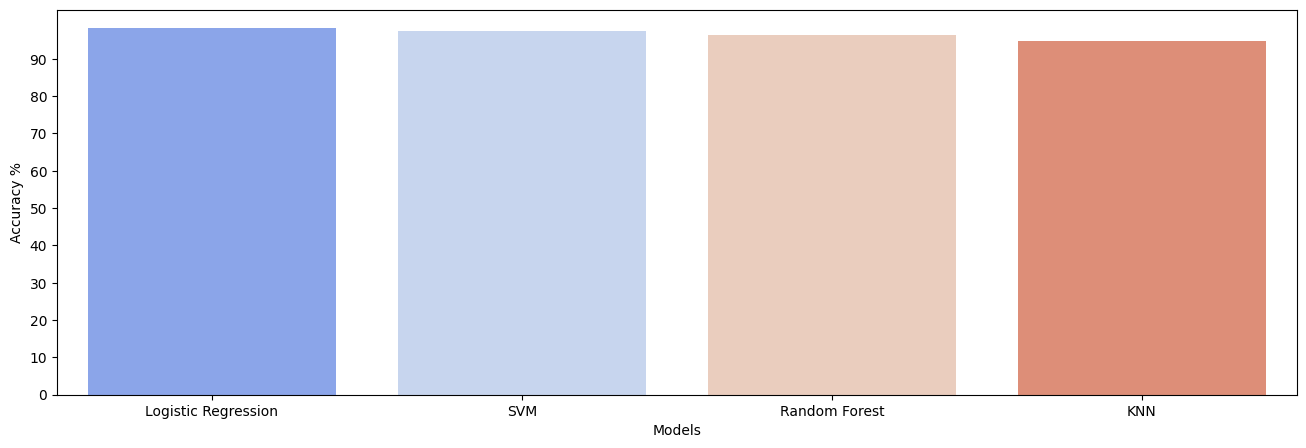

In [34]:
plt.figure(figsize=(16,5))
plt.yticks(np.arange(0,100,10))
plt.ylabel("Accuracy %")
plt.xlabel("Models")
sns.barplot(x=list(Accuracies.keys()), y=list(Accuracies.values()), palette='coolwarm')
plt.show()

**Logistc Regression has the Highest Accuracy 98.2456%**

# Save The Model

In [35]:
# save the model
with open('model.pkl', 'wb') as file:
    pickle.dump(lr, file)

# Features Selection

To reduce input complexity in the GUI, I applied feature selection. I selected the top 10 features based on model-based importance which had the highest predictive power for breast cancer classification.

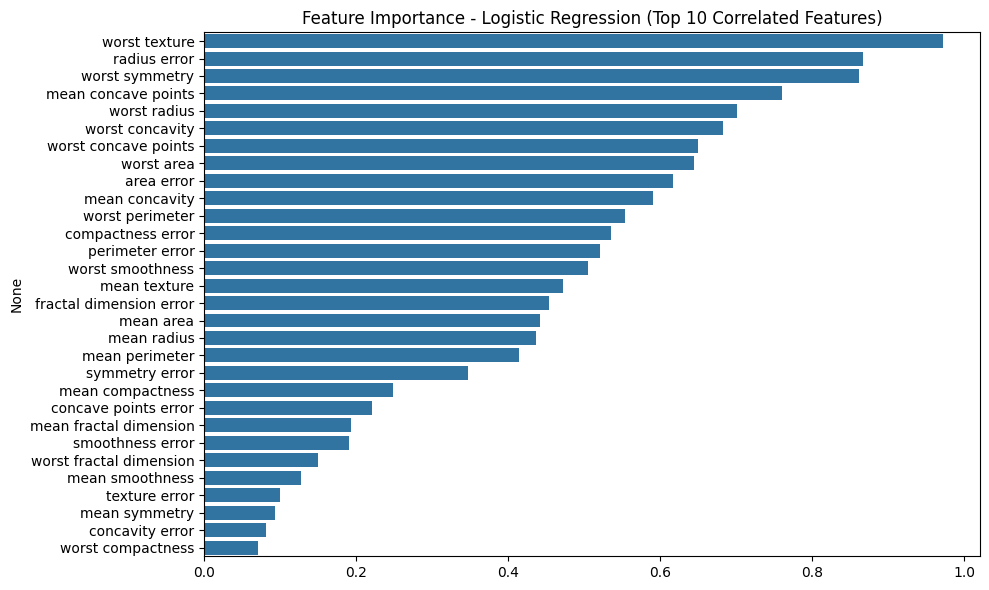

In [36]:
importance = np.abs(lr.coef_[0])
indices = np.argsort(importance)[::-1]
features = X.columns[indices]

plt.figure(figsize=(10, 6))
sns.barplot(x=importance[indices], y=features)
plt.title("Feature Importance - Logistic Regression (Top 10 Correlated Features)")
plt.tight_layout()
plt.show()

In [38]:
features = X.columns[indices][:10]
print("Top 10 important features:")
for feature in features:
    print(feature)

Top 10 important features:
worst texture
radius error
worst symmetry
mean concave points
worst radius
worst concavity
worst concave points
worst area
area error
mean concavity


# Retrain The Model

In [39]:
# define top 10 features
top_10_features = [
    "worst texture",
    "radius error",
    "worst symmetry",
    "mean concave points",
    "worst radius",
    "worst concavity",
    "worst concave points",
    "worst area",
    "area error",
    "mean concavity"
]


# input and target
X = df[top_10_features]
y = df['target']

# split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# normalize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [40]:
lr_retrained = LogisticRegression()
lr_retrained.fit(X_train_scaled, y_train)

# Predictions
y_pred = lr_retrained.predict(X_test_scaled)
y_proba = lr_retrained.predict_proba(X_test_scaled)[:, 1]

# Evaluation

In [41]:
acc = accuracy_score(y_test, y_pred) * 100
roc_auc = roc_auc_score(y_test, y_proba)

print(f"Accuracy: {acc:.2f}%")
print(f"ROC AUC Score: {roc_auc * 100:.4f}")
print(f"Train Score: {lr_retrained.score(X_train_scaled, y_train) * 100:.2f}%")
print(f"Test Score: {lr_retrained.score(X_test_scaled, y_test) * 100:.2f}%")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 97.37%
ROC AUC Score: 99.6725
Train Score: 97.36%
Test Score: 97.37%

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



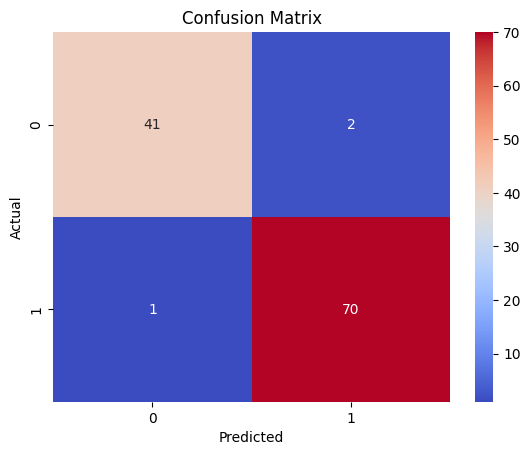

In [42]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Test Prediction

In [43]:
# test example
sample = X_test.iloc[0:1]
sample_scaled = scaler.transform(sample)
prediction = lr_retrained.predict(sample_scaled)

print("Model prediction:", "Benign" if prediction[0] == 1 else "Malignant")
print("Actual:", "Benign" if y_test.iloc[0] == 1 else "Malignant")


Model prediction: Benign
Actual: Benign


# Save Final Model

In [44]:
# save the model
with open('breast_cancer_model.pkl', 'wb') as f:
    pickle.dump(lr_retrained, f)

# save the scaler
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

# Conclusion

The Logistic Regression model, retrained using the top 10 most important features, delivered excellent performance:

Accuracy: 97.37%

ROC AUC Score: 99.67%

Precision: 97% for malignant cases

Recall: 99% for malignant cases

F1-Score: 98% for malignant cases

This indicates that the model is highly effective at correctly identifying both benign and malignant tumors, with very few misclassifications. The high recall and AUC score are especially important in a medical context, as they show that the model rarely misses malignant cases.